# LeNet 신경망
3-1. Simple Classifier에서 겪었던 문제점을 LeNet은 해결해 줄 수 있을까?<br>
한 번 제대로 시작해보자.

Reference:<br>
https://github.com/Steve-YJ/deep-learning-from-scratch-studying/blob/master/03_PyTorch%EB%A1%9C%2060%EB%B6%84%EB%A7%8C%EC%97%90%20%EB%94%A5%EB%9F%AC%EB%8B%9D%ED%95%98%EA%B8%B0/03.%20Neural%20Networks.ipynb

앞선 3-1. Simple Classifier의 데이터를 불러오자.<br>
대부분 학습 방법이 비슷하기에 <code>나만의 학습 패턴</code>을 만들어놓도록 하자

* Image Classifier 학습 패턴
    * #1. Import Library & Load Data
    * #2. Data Preprocessing
    * #3. Make Tensor
    * #4. 신경망 구성
    * #5. 모형 학습
    * #6. Accuracy Test
        참고<br>https://github.com/Steve-YJ/deep-learning-from-scratch-studying/blob/master/02_PyTorch_Introduction_Basic/Ch06_6.2_%EC%99%80%EC%9D%B8%20%EB%B6%84%EB%A5%98%EA%B8%B0%ED%95%98%EA%B8%B02_.ipynb

## #1. Import Library & Load Data

* PyTorch Library, scikit-learn Library, Pandas Library
* Load Data

참고 - PyTorch 머신러닝, 딥러닝 철저입문

In [1]:
# 기본 라이브러리 임포트
import os
import pickle
import numpy as np

# PyTorch 라이브러리 임포트
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset

# scikit-learn 라이브러리 임포트
from sklearn.model_selection import train_test_split

# Pandas 라이브러리 임포트
import pandas as pd

### Load Data
Load pickle data

미리 저장해둔 Image data를 불러온다.<br>

In [2]:
with open('../data.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
# data

In [4]:
malimg = data

In [5]:
data = malimg[0]
target = malimg[1]
print(data)
print(target)

[[ 94.  32.   2. ... 129. 102. 124.]
 [ 54.  29.   6. ... 106. 119. 100.]
 [ 54.  29.   6. ... 120. 126. 104.]
 ...
 [ 65.  22.  59. ... 117. 116.  98.]
 [ 65.  22.  59. ... 117. 116.  98.]
 [ 65.  22.  59. ... 117. 116.  98.]]
[ 0.  0.  0. ... 24. 24. 24.]


In [6]:
print('shape of data: ', data.shape)
print('shape of target: ', target.shape)

shape of data:  (9339, 50176)
shape of target:  (9339,)


In [9]:
print(type(data))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


이미지가 제대로 불러졌는지 plot을 통해 확인해보자.

In [10]:
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline # 이미지를 노트북안에 출력하도록 함


UsageError: unrecognized arguments: # 이미지를 노트북안에 출력하도록 함


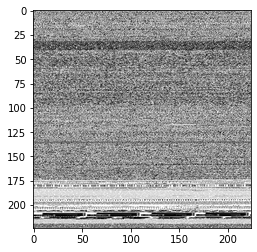

In [11]:
plt.imshow(data[9338].reshape(224,224), cmap=cm.gray_r)
plt.show()

Torch로 학습하기 위해서는 Tensor로 변환을 해주어야 한다.

다음장 전처리에서 50176차원의 데이터를 224X224형상으로 변경해줘야한다!

다음장에서 하기 보다는 이번장에서 바로 작업을 해주는게 더 효율적인것으로 판단.<br>
이번장에서 데이터의 형상을 (9339, 50176)에서 (9339, 1, 224, 224)로 변경해준다.

In [12]:
data.shape

(9339, 50176)

In [13]:
data.reshape(9339, 1, 224, 224).shape

(9339, 1, 224, 224)

training을 위한 data 형상 변경 완료

* 정리
    * #1. Import Library, Load Data에는
    * torch 라이브러리를 불러왔다
    * pickle로 저장된 data를 불러왔다.
    * Training을 위해 data의 형상을 바쭤주었다 (9339, 50176) -> (9339, 1, 224, 244)   <== 이 부분을 Part2(Data Preprocessing)로 옮기자

## #2. Data Preprocessing
* data shape변경
* 설명변수 목적변수 분할
* Train_Test Split

### 학습을 위한 data shape 변경

In [14]:
data = data.reshape(9339, 1, 224, 224)
print('data.shape:', data.shape)
print('target.shape: ', target.shape)

data.shape: (9339, 1, 224, 224)
target.shape:  (9339,)


설명변수 목적변수 분할은 이미 되어있으므로 생략한다.

### Train_Test Split

In [15]:
train_X, test_X, train_Y, test_Y = train_test_split(data, target, test_size=0.2)

## #3. Make Tensor

완성된 train, test 데이터를 PyTorch의 Tensor 데이터로 변환해준다.<br>
즉 모델이 학습할 수 있는 데이터로 변환해주는 것이다.<br>
이 때 주의할 점은 두 가지이다.
* cuda()형태의 데이터로 변환
* shape reshape

### Tensor GPU loading

In [16]:
train_X = torch.from_numpy(train_X).float().cuda()
train_Y = torch.from_numpy(train_Y).long().cuda()

Window Task Manager로 확인을 해보면 GPU memory사용량이 증가하는 것을 볼 수 있다.<br>
순식간에 2.3GB가 할당되었다.

In [17]:
# test_X = torch.from_numpy(test_X).float().cuda()
# test_Y = torch.from_numpy(test_Y).long().cuda()
test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()

In [18]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

torch.Size([7471, 1, 224, 224])
torch.Size([7471])
torch.Size([1868, 1, 224, 224])
torch.Size([1868])


In [19]:
train_X.shape

torch.Size([7471, 1, 224, 224])

### 설명변수와 목적변수 병합

In [20]:
train = TensorDataset(train_X, train_Y)

# 텐서와 첫 번째 데이터 내용 확인
print(train[0])

(tensor([[[ 42.,  48.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  1.,   2.,   0.,  ...,   0.,   0.,   1.],
         ...,
         [139., 154., 140.,  ...,  88., 106.,  62.],
         [ 96.,  58.,  98.,  ...,  59.,  78.,  97.],
         [ 51., 136.,  76.,  ..., 108., 109., 166.]]], device='cuda:0'), tensor(11, device='cuda:0'))


### Mini-Batch 분할

In [21]:
# train_loader = DataLoader(train, batch_size=16, shuffle=True)

batch_size는 100으로 한다.

메모리 부담을 줄이기 위해 배치사이즈를 줄여준다.<br>
* test1: 100 -> 64
* test2: 64 -> 16

In [22]:
train_loader = DataLoader(train, batch_size=64, shuffle=True)

갑자기 batch가 헷갈리네...

## #4. 신경망 구성

LeNet.py로 구성한 LeNet을 불러온다.
* 데이터의 사이즈가 224x224이기에 conv층을 3층 추가해주었다. 
* 기존 2Conv에서 5Conv로 변환

In [23]:
import LeNet

In [24]:
model = LeNet.Net()
model = model.cuda()
print(model)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(48, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=25, bias=True)
)


In [28]:
test1 = model(train_X[0].reshape(1, 1, 224, 224).cuda())

test1

tensor([[-2.9057, -3.0265, -3.1786, -3.2486, -3.4776, -3.0033, -2.8786, -3.2491,
         -2.7662, -3.9546, -3.2230, -3.2113, -3.7033, -3.0511, -2.8763, -3.0037,
         -3.5924, -3.6272, -3.6170, -3.0145, -3.1974, -3.5233, -3.5102, -3.5723,
         -3.1633]], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [31]:
test1.sum()

tensor(-81.5749, device='cuda:0', grad_fn=<SumBackward0>)

마지막 layer를 Softmax Layer로 변경함<br>
이제는 수렴할 것인가...!!  --20.04.17.fri.pm 2:27--

#### 모델의 학습 가능한 매개변수들은 <code>net.parameters()</code>에 의해 반환된다.

In [32]:
params = list(model.parameters())
print(len(params))
print(params[0].size())

16
torch.Size([6, 1, 3, 3])


Q. torch.Size([6, 1, 3, 3])이란 무엇인가??

필터를 통해 학습하는 parameter의 shape이다.

In [33]:
print(params[2].shape)

torch.Size([16, 6, 3, 3])


## #5. 모형 학습

이 신경망(LeNet)의 예상되는 입력의 크기는 32x32이다. 224x224 데이터를 학습시키기 위해서는 어떻게 해야할까?

Q2. 이 전에 배우길, 32x32로 학습시키기 위해서는 이미지의 크기를 32x32로 변경해야 한다고 했다. 50176 크기의 데이터를 224x224로 변형해줘야 하지 않을까? <br>
A2. shape 변경을 통해 모델이 학습가능한 Input shape로 변경해주었다.

### Load Model
지난 트레이닝을 통해 저장한 Model을 불러온다.

In [35]:
savePATH = "./test_model.pth"

# model = model
model.load_state_dict(torch.load(savePATH))
model.eval()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(48, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=25, bias=True)
)

In [36]:
test2 = model(train_X[0].reshape(1, 1, 224, 224).cuda())

test2

K:\Exp_malimg\03. Classifier\LeNet.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)  # 마지막 return값은 log_softmax()


tensor([[-1.0102e+02, -1.1711e+02, -4.3534e+01, -7.1532e+01, -1.4015e+01,
         -1.7606e+02, -7.6100e+01, -6.4367e+01, -1.3202e+02, -5.1627e+01,
         -6.7405e+01, -9.5367e-07, -7.3342e+01, -6.1277e+01, -2.8534e+01,
         -1.5903e+02, -1.3316e+02, -6.8789e+01, -1.2810e+02, -3.8146e+01,
         -1.0413e+02, -6.3560e+01, -6.2251e+01, -1.4663e+02, -1.6705e+02]],
       device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [45]:
torch.sum(test1)

tensor(-81.5749, device='cuda:0', grad_fn=<SumBackward0>)

In [46]:
torch.sum(test2)

tensor(-2148.7866, device='cuda:0', grad_fn=<SumBackward0>)

---
Max Value & Index

---
Argmax with PyTorch

In [52]:
test1_value, test1_index = torch.max(test1, 1)
print(test1_value, test1_index)

tensor([-2.7662], device='cuda:0', grad_fn=<MaxBackward0>) tensor([8], device='cuda:0')


In [53]:
test_2_value, test2_index = torch.max(test2, 1)
print(test_2_value, test2_index)

tensor([-9.5367e-07], device='cuda:0', grad_fn=<MaxBackward0>) tensor([11], device='cuda:0')


합이 왜 1이 아니지?? 라고 의아하게 생각했는데 내가 사용한 함수가 softmax가 아니라 <code>LogSoftmax</code>였기 떄문이다. 합이 1이 되지는 않지만 안정성이 있고 속도도 빠르다. 즉 결과에는 이상이 없다.

* PyTorch Docs
* https://pytorch.org/docs/stable/nn.html
* fast.ai forums
* https://forums.fast.ai/t/logsoftmax-vs-softmax/14469/2
<br>
This module doesn’t work directly with NLLLoss, which expects the Log to be computed between the Softmax and itself. Use LogSoftmax instead (it’s faster and has better numerical properties).

모델을 제대로 불러온 것 같다.학습을 마저 하면 되겠다. --20.04.18.sat.pm12:46--

In [54]:
optimizer = optim.Adam(model.parameters(), lr=0.013)

In [55]:
# 모델의 state_dict 출력
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
    
# 옵티마이저의 state_dict 출력
print("Optimizer's state_dict: ")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([6, 1, 3, 3])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 3, 3])
conv2.bias 	 torch.Size([16])
conv3.weight 	 torch.Size([32, 16, 3, 3])
conv3.bias 	 torch.Size([32])
conv4.weight 	 torch.Size([48, 32, 3, 3])
conv4.bias 	 torch.Size([48])
conv5.weight 	 torch.Size([16, 48, 3, 3])
conv5.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([25, 84])
fc3.bias 	 torch.Size([25])
Optimizer's state_dict: 
state 	 {}
param_groups 	 [{'lr': 0.013, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False, 'params': [1860703414216, 1860703634600, 1860703635960, 1860703644152, 1860703644872, 1860703643672, 1860703644792, 1860703645112, 1860703643272, 1860703642312, 1860703642072, 1860703644952, 1860703112632, 1860703577896, 1860703579256, 1860703579896]}]


In [ ]:
# # model라는 이름으로 클래스의 인스턴스 생성
# model = LeNet.Net()
# model = model.cuda()
# 오차함수 객체 생성
criterion = nn.CrossEntropyLoss()

# 최적화를 담당할 객체 생성
optimizer = optim.Adam(model.parameters(), lr=20)

# 학습 시작
for epoch in range(2000):
    total_loss = 0
    # 분할해둔 데이터를 꺼내온다.
    for train_x, train_y in train_loader:
        # 계산 그래프 구성
        train_x, train_y = Variable(train_x), Variable(train_y)
        # 경사 초기화
        optimizer.zero_grad()
        #순전파 계산
        output = model(train_x)
        # 오차 계산
        loss = criterion(output, train_y)
        # 역전파 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        # 누적 오차 계산
        total_loss += loss.data
        
        
    # 10회 마다 누적 오차 출력
    if (epoch+1) % 1 == 0:
        print(epoch+1, total_loss)

1 tensor(2312.0540, device='cuda:0')
2 tensor(516.6872, device='cuda:0')
3 tensor(988.3414, device='cuda:0')
4 tensor(1685.3204, device='cuda:0')
5 tensor(1788.8417, device='cuda:0')
6 tensor(767.5287, device='cuda:0')
7 tensor(840.3389, device='cuda:0')


## 모델 저장하기
* https://tutorials.pytorch.kr/beginner/saving_loading_models.html
* 추론(inference)를 위한 모델을 저장할 것인가
* 일반 체크포인트(checkpoint) 저장할 것인가
기본적인 개념부터 이해한 다음에 프로젝트에 적용해 볼 수 있도록하자.

## Minak이 알려준 모델 저장 방법

reference: https://tutorials.pytorch.kr/beginner/saving_loading_models.html

* 모델의 state_dict
* 옵티마이저의 state_dict

모델 초기화<br>
옵티마이저 초기화<br>
모델의 state_dict출력<br>
옵티마이저의 state_dict출력 

In [45]:
model

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(48, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=25, bias=True)
)

In [47]:
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.013
    weight_decay: 0
)

In [71]:
# 모델의 state_dict 출력
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())
    
# 옵티마이저의 state_dict 출력
print("Optimizer's state_dict: ")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([6, 1, 3, 3])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 3, 3])
conv2.bias 	 torch.Size([16])
conv3.weight 	 torch.Size([32, 16, 3, 3])
conv3.bias 	 torch.Size([32])
conv4.weight 	 torch.Size([48, 32, 3, 3])
conv4.bias 	 torch.Size([48])
conv5.weight 	 torch.Size([16, 48, 3, 3])
conv5.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([25, 84])
fc3.bias 	 torch.Size([25])
Optimizer's state_dict: 
state 	 {3097916588584: {'step': 881, 'exp_avg': tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]]],


        [[[0.0652, 0.0897, 0.0844],
          [0.0081, 0.0278, 0.0179],
          [0.0506, 0.0430, 0.0439]]],


        [[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.000

#### 추론(inference)를 위해 모델 저장하기 & 불러오기
<code>state_dict</code>저장하기/불러오기 (권장)

In [23]:
# savePATH = "K:\Exp_malimg\03. Classifier\test_model.pth"
# Reference:
# https://jangjy.tistory.com/317

savePATH = "./test_model.pth"

# 저장시 풀어서 사용
# torch.save(model.state_dict(), savePATH)

### Loading model

In [24]:
savePATH = "./test_model.pth"

model = model
model.load_state_dict(torch.load(savePATH))
model.eval()

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(48, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=25, bias=True)
)

### loss with Test & Validation

<<<< **next** <<<<

Learning Rate를 높여서 학습해보자
0.01에서 0.015로  # 마이낙 추천

---
## 이전 log
---

값이 전혀 수렴을 하지 못하고 있다.. -- 20.04.17.fri.am9.11--

* 학습이 전혀 되지 않을 때 방법
    * 파이토치 첫걸음 6-2(다층퍼셉트론)학습과 7-2(CNN)학습을 비교해보자
    * Key Paper에서 본 데이터를 통해 실험한 repository를 참고해 어떻게 실험해야 하는지 소스를 참고하도록 하자

Epoch의 수가 너무 작다. 2000으로 늘려보자<br>
출력은 10 단위로!

In [36]:
train_X.shape

torch.Size([7471, 1, 224, 224])

#### matplot library로 데이터 시각화
제대로된 학습이 되지 않는 이유가 데이터 shape문제 때문인지 한번 직접 뿌려서 확인해보자.

In [38]:
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline # 이미지를 노트북안에 출력하도록 함
plt.imshow(train_X[0].reshape(224,224).cpu(), cmap=cm.gray_r)
plt.show()

UsageError: unrecognized arguments: # 이미지를 노트북안에 출력하도록 함


batch사이즈를 100으로 한 번 늘려서 학습해보고 결과가 비슷하면 shape을 변경하는 코드를 다시 짜보자<br>
-20.04.17.fri-

## #6. Accuracy Test

### #2. 손실 함수(Loss Function)

In [18]:
input.shape

torch.Size([1, 1, 224, 224])

In [19]:
out = net(input)
out

tensor([[ 0.0781,  0.0022, -0.0408, -0.0224,  0.1153,  0.0840, -0.0416,  0.0545,
         -0.0296,  0.0198,  0.0179,  0.0489, -0.0859, -0.1015, -0.0310,  0.0112,
          0.0644, -0.1010,  0.0435, -0.0988, -0.0015, -0.0356,  0.0389,  0.0066,
         -0.0210]], device='cuda:0', grad_fn=<AddmmBackward>)

In [21]:
# example of MSE
output = net(input)
target = torch.randn(25).cuda()
target = target.view(1, -1)

criterion = nn.MSELoss()
loss = criterion(output, target)
print('loss: ', loss)

loss:  tensor(1.3235, device='cuda:0', grad_fn=<MseLossBackward>)


### #3. 역전파(Backward)
오차(Error)를 역전파하기 위해서 <code>loss.backward()</code>만 해주면 된다.

In [23]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.], device='cuda:0')
conv1.bias.grad before backward
tensor([ 2.8392e-04,  1.5035e-03,  7.9345e-05,  3.2950e-04, -8.5058e-05,
        -5.7681e-04], device='cuda:0')


### #4. 가중치 갱신

In [24]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [25]:
import torch.optim as optim

# Optimizer를 생성한다.
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 학습 과정(training loop)에서는 다음과 같다.
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()